
###################################
# Group ID : 420
# Members : Matias Mose,  Henrik Paaske Lind, Amalie Koch Andersen, Phillip Kaasgaard Sperling
# Date : 19-03-2025
# Lecture: Lecture 6: MLP 
# Dependencies: first section is an import section 
# Python version: 3.12.5
# Functionality: This notebook is used for training a MLP for predicting numbers from the mnist dataset. 
# ###################################

Exercises for Lecture 6: Multilayer perceptrons: develop an MLP for the MNIST database by using the LDA generated 9-dimensional data from your work on DAY 3. You can download the LDA projected data "mnist_lda.mat" under the folder "Data and code" above. Experiment on various MLP architectures and learning rates. (Functions for MLP in the NETLAB toolbox include mlp.m, mlptrain.m and mlpfwd.m.)


In [118]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier as MLPC
import time
import warnings

warnings.simplefilter(action='ignore') #Ignore warnings

 Dimensionality reduction using LDA has been done for the dataset. But we have to split it into train and test. 

In [119]:
file = "mnist_lda.mat"
data = loadmat(file)

train_data = data['train_data']
train_labels = data['train_class']
test_data = data['test_data']
test_labels = data['test_class']

Make MLP

In [120]:
#We tried different solvers, learning rates, and hidden layer sizes to find the best combination.
#Of the more simple ones, we tried small networks of 8 and 16 neurons, resulting in accuracies of approx. 80%
#Scaling up to 128x128x64 neurons, we achieved an accuracy of 92.31%.
#We also tried different learning rates, but the default of 'adaptive' seemed to work best.
clf_best = MLPC(solver='sgd', 
            alpha=1e-4,
            hidden_layer_sizes=(128, 128, 64,), 
            learning_rate='adaptive')
# Accuracy:  0.9231
clf_new = MLPC(solver='sgd', 
            alpha=1e-4,
            hidden_layer_sizes=(128, 128, 64,), 
            learning_rate='adaptive')

clf_new.fit(train_data, train_labels)
print("Internal Accuracy: ", clf_new.score(train_data, train_labels))

Internal Accuracy:  0.9400666666666667


Test the MLP

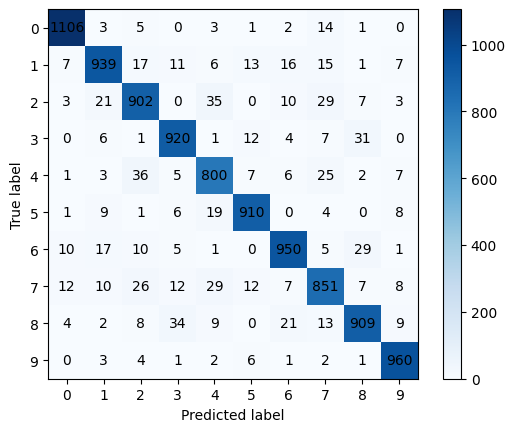

Accuracy:  0.9247


In [121]:
predictions = clf_new.predict(test_data)
cm = confusion_matrix(test_labels, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
#Change the color to a pretty blue gradient
cm_display.im_.set_cmap('Blues')

# Change the color of the text in the confusion matrix to black
for text in cm_display.text_.ravel():
    text.set_color('black')

plt.show()
print("Accuracy: ", clf_new.score(test_data, test_labels))